In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

df = pd.read_excel('HW6.xlsx')

df = df.drop(0)
df = df.drop('Unnamed: 5', axis=1)
df.columns = ["time", "2330", "2303", "2882", "Rm", "rf"]

nonNAN_rf = np.isfinite(df['rf'].to_numpy(dtype=float))
x = df.index[nonNAN_rf]
y = df['rf'][nonNAN_rf]
f = interp1d(x, y)
df['rf'] = f(df.index)

df['2330-rf'] = df['2330']-df['rf']
df['2303-rf'] = df['2303']-df['rf']
df['2882-rf'] = df['2882']-df['rf']
df['Rm-rf'] = df['Rm']-df['rf']

nonNAN_2330 = np.isfinite(df['2330-rf'].to_numpy(dtype=float))
nonNAN_2882 = np.isfinite(df['2882-rf'].to_numpy(dtype=float))

C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Ri-rf = 1.94 + 1.03*(Rm-rf)
Ri-rf = 0.95*(Rm-rf)


Text(0.5, 1.0, '2330')

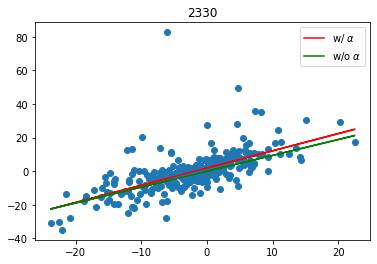

In [2]:
#2330
reg1 = LinearRegression().fit(df['Rm-rf'][nonNAN_2330].to_numpy().reshape(-1, 1), df['2330-rf'][nonNAN_2330].to_numpy().reshape(-1, 1))
reg2 = LinearRegression(fit_intercept=False).fit(df['Rm-rf'][nonNAN_2330].to_numpy().reshape(-1, 1), df['2330-rf'][nonNAN_2330].to_numpy().reshape(-1, 1))

pred1 = reg1.predict(df['Rm-rf'][nonNAN_2330].to_numpy().reshape(-1, 1))
pred2 = reg2.predict(df['Rm-rf'][nonNAN_2330].to_numpy().reshape(-1, 1))

print("Ri-rf = ", '%.2f'%(reg1.intercept_) , " + ", '%.2f'%(reg1.coef_[0]), "*(Rm-rf)", sep='')
print("Ri-rf = ", '%.2f'%(reg2.coef_[0]), "*(Rm-rf)", sep='')

plt.scatter(df['Rm-rf'][nonNAN_2330], df['2330-rf'][nonNAN_2330])
plt.plot(df['Rm-rf'][nonNAN_2330], pred1, color='r', label=r'w/ $\alpha$')
plt.plot(df['Rm-rf'][nonNAN_2330], pred2, color='g', label=r'w/o $\alpha$')
plt.legend()
plt.title("2330")

Ri-rf = 1.42 + 1.09*(Rm-rf)
Ri-rf = 1.04*(Rm-rf)


Text(0.5, 1.0, '2303')

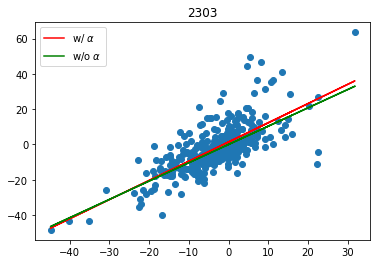

In [3]:
#2303
reg1 = LinearRegression().fit(df['Rm-rf'].to_numpy().reshape(-1, 1), df['2303-rf'].to_numpy().reshape(-1, 1))
reg2 = LinearRegression(fit_intercept=False).fit(df['Rm-rf'].to_numpy().reshape(-1, 1), df['2303-rf'].to_numpy().reshape(-1, 1))

pred1 = reg1.predict(df['Rm-rf'].to_numpy().reshape(-1, 1))
pred2 = reg2.predict(df['Rm-rf'].to_numpy().reshape(-1, 1))

print("Ri-rf = ", '%.2f'%(reg1.intercept_) , " + ", '%.2f'%(reg1.coef_[0]), "*(Rm-rf)", sep='')
print("Ri-rf = ", '%.2f'%(reg2.coef_[0]), "*(Rm-rf)", sep='')

plt.scatter(df['Rm-rf'], df['2303-rf'])
plt.plot(df['Rm-rf'], pred1, color='r', label=r'w/ $\alpha$')
plt.plot(df['Rm-rf'], pred2, color='g', label=r'w/o $\alpha$')
plt.legend()
plt.title("2303")

Ri-rf = -0.19 + 0.89*(Rm-rf)
Ri-rf = 0.90*(Rm-rf)


Text(0.5, 1.0, '2882')

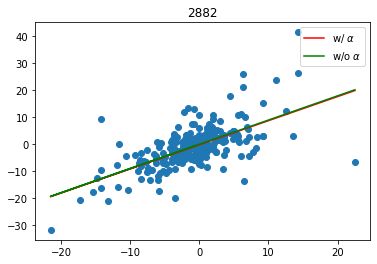

In [4]:
#2882
reg1 = LinearRegression().fit(df['Rm-rf'][nonNAN_2882].to_numpy().reshape(-1, 1), df['2882-rf'][nonNAN_2882].to_numpy().reshape(-1, 1))
reg2 = LinearRegression(fit_intercept=False).fit(df['Rm-rf'][nonNAN_2882].to_numpy().reshape(-1, 1), df['2882-rf'][nonNAN_2882].to_numpy().reshape(-1, 1))

pred1 = reg1.predict(df['Rm-rf'][nonNAN_2882].to_numpy().reshape(-1, 1))
pred2 = reg2.predict(df['Rm-rf'][nonNAN_2882].to_numpy().reshape(-1, 1))

print("Ri-rf = ", '%.2f'%(reg1.intercept_) , " + ", '%.2f'%(reg1.coef_[0]), "*(Rm-rf)", sep='')
print("Ri-rf = ", '%.2f'%(reg2.coef_[0]), "*(Rm-rf)", sep='')

plt.scatter(df['Rm-rf'][nonNAN_2882], df['2882-rf'][nonNAN_2882])
plt.plot(df['Rm-rf'][nonNAN_2882], pred1, color='r', label=r'w/ $\alpha$')
plt.plot(df['Rm-rf'][nonNAN_2882], pred2, color='g', label=r'w/o $\alpha$')
plt.legend()
plt.title("2882")

Y = 1.33 + 0.29*X
Y = 0.30*X
Σ(ε1) = [7.482903185973555e-14]
Σ(ε2) = [301.62442527164086]


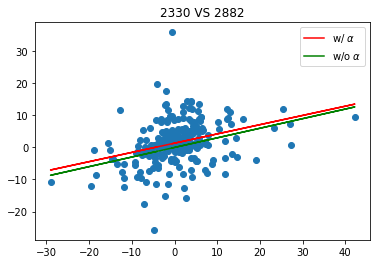

In [5]:
#2330 VS 2882
nonNAN = nonNAN_2330 & nonNAN_2882

reg1 = LinearRegression().fit(df['2882'][nonNAN].to_numpy().reshape(-1, 1), df['2330'][nonNAN].to_numpy().reshape(-1, 1))
reg2 = LinearRegression(fit_intercept=False).fit(df['2882'][nonNAN].to_numpy().reshape(-1, 1), df['2330'][nonNAN].to_numpy().reshape(-1, 1))

pred1 = reg1.predict(df['2882'][nonNAN].to_numpy().reshape(-1, 1))
pred2 = reg2.predict(df['2882'][nonNAN].to_numpy().reshape(-1, 1))

print("Y = ", '%.2f'%(reg1.intercept_) , " + ", '%.2f'%(reg1.coef_[0]), "*X", sep='')
print("Y = ", '%.2f'%(reg2.coef_[0]), "*X", sep='')

plt.scatter(df['2882'][nonNAN], df['2330'][nonNAN])
plt.plot(df['2882'][nonNAN], pred1, color='r', label=r'w/ $\alpha$')
plt.plot(df['2882'][nonNAN], pred2, color='g', label=r'w/o $\alpha$')
plt.legend()
plt.title("2330 VS 2882")

epsilon1 = sum(df['2330'][nonNAN].to_numpy().reshape(-1, 1)-pred1)
epsilon2 = sum(df['2330'][nonNAN].to_numpy().reshape(-1, 1)-pred2)
print('\u03A3(\u03B51) =', epsilon1)
print('\u03A3(\u03B52) =', epsilon2)